# 🛍️ Produkt Klasifikacija

Ova sveska prikazuje primer klasifikacije proizvoda u kategorije pomoću **TF-IDF** i **Logistic Regression** modela.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:

data = {
    'product_name': [
        'iPhone 15 Pro Max 256GB',
        'Samsung Galaxy S24 Ultra',
        'Lenovo ThinkPad X1 Carbon',
        'MacBook Air M2',
        'iPad Pro 12.9',
        'Xiaomi Redmi Note 13',
        'Dell XPS 13',
        'Asus ROG Gaming Laptop',
        'Huawei MatePad',
        'Microsoft Surface Laptop 5'
    ],
    'category': [
        'smartphone',
        'smartphone',
        'laptop',
        'laptop',
        'tablet',
        'smartphone',
        'laptop',
        'laptop',
        'tablet',
        'laptop'
    ]
}

df = pd.DataFrame(data)
df


,product_name,category
0,iPhone 15 Pro Max 256GB,smartphone
1,Samsung Galaxy S24 Ultra,smartphone
2,Lenovo ThinkPad X1 Carbon,laptop
3,MacBook Air M2,laptop
4,iPad Pro 12.9,tablet
5,Xiaomi Redmi Note 13,smartphone
6,Dell XPS 13,laptop
7,Asus ROG Gaming Laptop,laptop
8,Huawei MatePad,tablet
9,Microsoft Surface Laptop 5,laptop


In [3]:

# Podela na train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['product_name'], df['category'], test_size=0.3, random_state=42
)

# TF-IDF vektorizacija
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [4]:

# Treniranje Logistic Regression modela
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predikcije
y_pred = model.predict(X_test_tfidf)


📊 Classification Report:
              precision    recall  f1-score   support

      laptop       0.00      0.00      0.00       0.0
  smartphone       0.00      0.00      0.00       2.0
      tablet       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

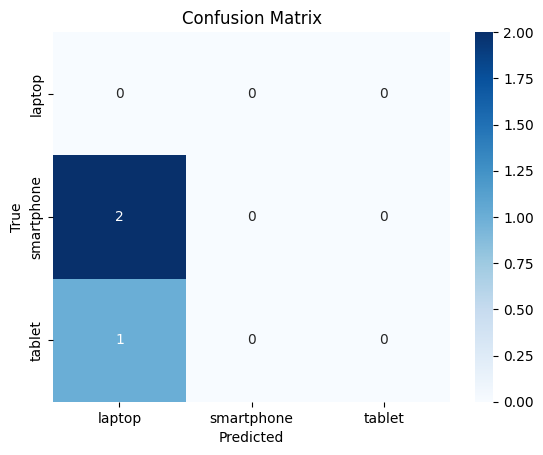

In [5]:

# Evaluacija modela
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


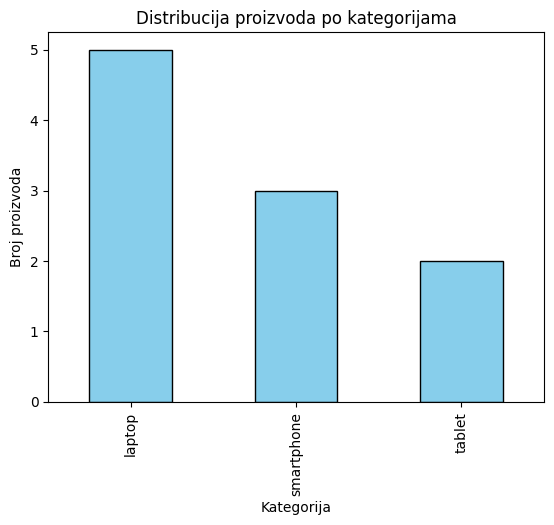

In [6]:

# Vizuelizacija raspodele kategorija
df['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribucija proizvoda po kategorijama")
plt.xlabel("Kategorija")
plt.ylabel("Broj proizvoda")
plt.show()
